In [1]:
# import all necessary libraries -------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Load Dataset ---------
data=pd.read_csv("netflix1.csv")

In [5]:
# Get first 5 rows data in datasets ------
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
# Get last 5 rows data in dataset---------
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [9]:
# Get all information about dataset--------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [11]:
# it will retrn shape (rows & column count) of dataset ---------
data.shape

(8790, 10)

In [13]:
# Check for missing values ---------
data.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [19]:
# Drop duplicates if any ---------
data=data.drop_duplicates()

In [21]:
data.duplicated().sum()

0

### Exploration Summary
> 1) we have a dataframe consisting of 8790 rows and 10 columns.
> 2) our dataset have no NaNs nor duplicated values.
> 3) date_added column needs to be casted into date time.
> 4) we can seperate complete dat format in year, month, and days.

In [144]:
# Change data type of data_added column object to datatime -----------
data["date_added"]=pd.to_datetime(data["date_added"])
print(data["date_added"].dtype)

datetime64[ns]


In [25]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


#### Q1) Count the number of Movies and TV Shows

In [27]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [146]:
# Get total value count of "type" column data in dataset-----------
type_count=data["type"].value_counts()
type_count

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

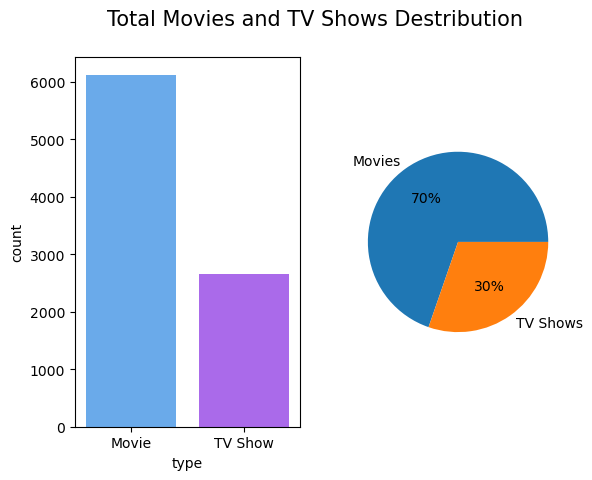

In [201]:
# Plot bar plot and pie chart -------------
plt.subplot(1,2,1)
sns.countplot(x="type",data=data,hue="type",palette="cool")
plt.subplot(1,2,2)
plt.pie(type_count,labels=["Movies","TV Shows"],autopct="%0.0f%%")
plt.suptitle("Total Movies and TV Shows Destribution", fontsize=15)
plt.show()

#### Q2) representation of rating frequency of movies and TV Shows on Netflix.

In [33]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [150]:
# # Get total value count of "rating" column data in dataset-----------
ratings=data["rating"].value_counts().reset_index()

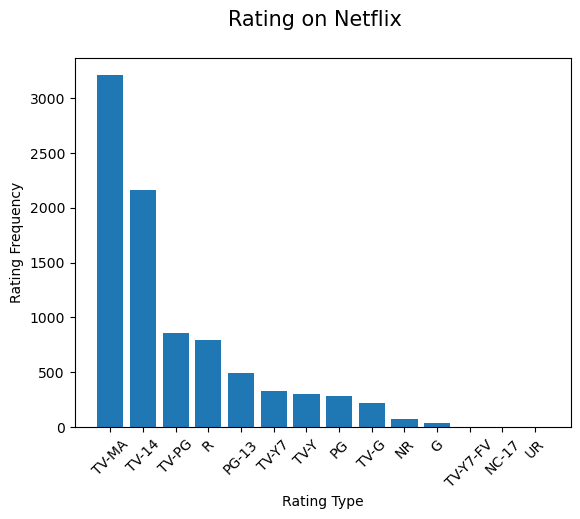

In [154]:
# plot bar chart -------------
plt.bar(ratings["rating"],ratings["count"])
plt.xticks(rotation=45)
plt.xlabel("Rating Type")
plt.ylabel("Rating Frequency")
plt.suptitle("Rating on Netflix",fontsize=15)
plt.show()

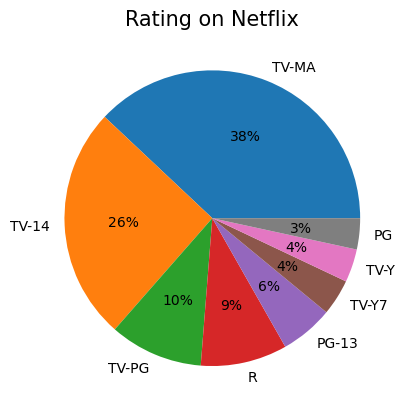

In [39]:
plt.pie(ratings["count"][:8],labels=(ratings["rating"][:8]),autopct="%0.0f%%")
plt.title("Rating on Netflix",fontsize=15)
plt.show()

#### Q3) Top 10 countries with most content on Netflix

In [41]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [156]:
# Get total value count of "country" column data in dataset-----------
data["country"].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [158]:
# get all unique values in "country " column ---------------
data["country"].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [160]:
# Get total count of all "country" and convert into DataFrame(.reset_index) sort them in descening order -------------- 
top_ten_country=data["country"].value_counts().reset_index().sort_values(by="count",ascending=False)[:10]

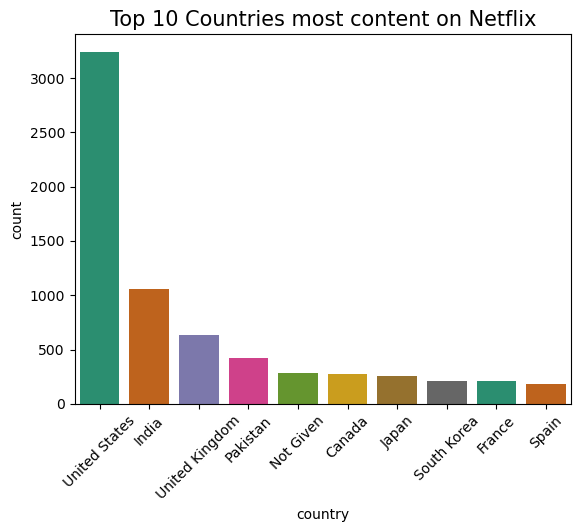

In [176]:
# plot the bar graph related to country and its movie and TV show relese frequency ------------
sns.barplot(x=top_ten_country["country"],y=top_ten_country["count"],hue=top_ten_country["country"],palette="Dark2")

plt.xticks(rotation=45)
plt.title("Top 10 Countries most content on Netflix",fontsize=15)

plt.show()

#### Q4) Monthly releases of Movies and TV shows on Netflix.

In [164]:
# convert complete datatime format into year, Months, and day ----------
data["year"]=data["date_added"].dt.year
data["month"]=data["date_added"].dt.month
data["day"]=data["date_added"].dt.day

In [166]:
# Get seperate "Movie" and "TV Shows" count in "type" column and sort them in month index ------------
movies_relese_month=data[data["type"]=="Movie"]["month"].value_counts().sort_index()
tvseries_relese_month=data[data["type"]=="TV Show"]["month"].value_counts().sort_index()

In [168]:
print(movies_relese_month)
print(tvseries_relese_month)

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64
month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64


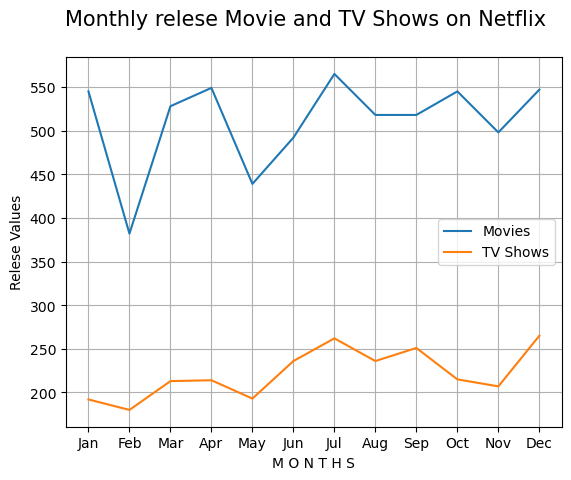

In [178]:
# Plot graph reeleted to movies and Tv shows with its month wise relese frequency -------------
plt.plot(movies_relese_month.index,movies_relese_month.values,label="Movies")
plt.plot(tvseries_relese_month.index,tvseries_relese_month.values,label="TV Shows")

plt.xlabel("M O N T H S")
plt.ylabel("Relese Values")
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()

plt.suptitle("Monthly relese Movie and TV Shows on Netflix", fontsize=15)
plt.grid()
plt.show()

#### Q5) Yearly releases of Movies and TV Shows on Netflix

In [172]:
# Get seperate "Movie" and "TV Shows" count in "type" column and sort them in year index ------------
movies_relese_year=data[data["type"]=="Movie"]["year"].value_counts().sort_index()
tvseries_relese_year=data[data["type"]=="TV Show"]["year"].value_counts().sort_index()

In [207]:
print(movies_relese_year)
print(tvseries_relese_year)

year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64
year
2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: count, dtype: int64


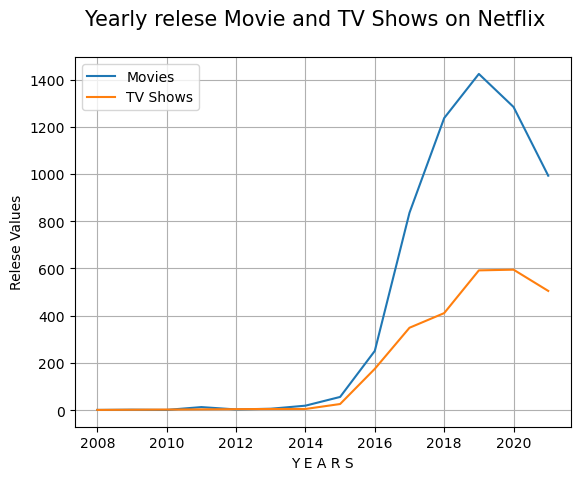

In [180]:
# Plot graph reeleted to movies and Tv shows with its month wise relese frequency -------------

plt.plot(movies_relese_year.index,movies_relese_year.values,label="Movies")
plt.plot(tvseries_relese_year.index,tvseries_relese_year.values,label="TV Shows")

plt.xlabel("Y E A R S")
plt.ylabel("Relese Values")
plt.suptitle("Yearly relese Movie and TV Shows on Netflix", fontsize=15)

plt.legend()

plt.grid()
plt.show()
plt.show()

#### Q6) Top 10 popular movie genres

##### There are two methos to get output
> 1) Grouped together all genre movies and perform operation
> 2) split all genres because with quame seperated values with space and perform operation

In [63]:
# First Method --------------
data.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24


In [182]:
# compare "type" with "movie" and grouped "listed_in"(Genres) common DataFreame ------------
top_popular_movies=data[data["type"]=="Movie"].groupby("listed_in").size().sort_values(ascending=False)[:10]

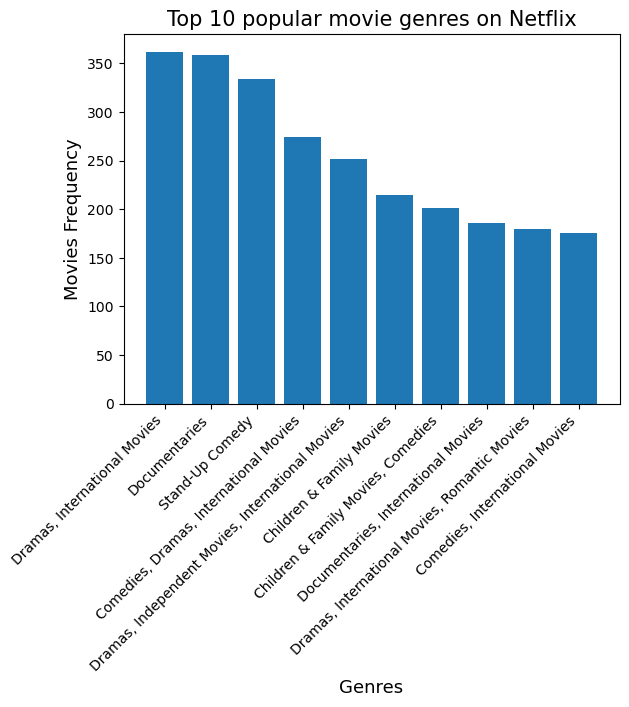

In [188]:
# Plot graph genres with movies ---------------

plt.bar(top_popular_movies.index,top_popular_movies.values)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genres",fontsize=13)
plt.ylabel("Movies Frequency",fontsize=13)
plt.title("Top 10 popular movie genres on Netflix",fontsize=15)
plt.show()

#### 7) Top 10 popular Tv Shoes genres

In [186]:
# compare "type" with "Tv Shows" and grouped "listed_in"(Genres) common DataFreame ------------

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

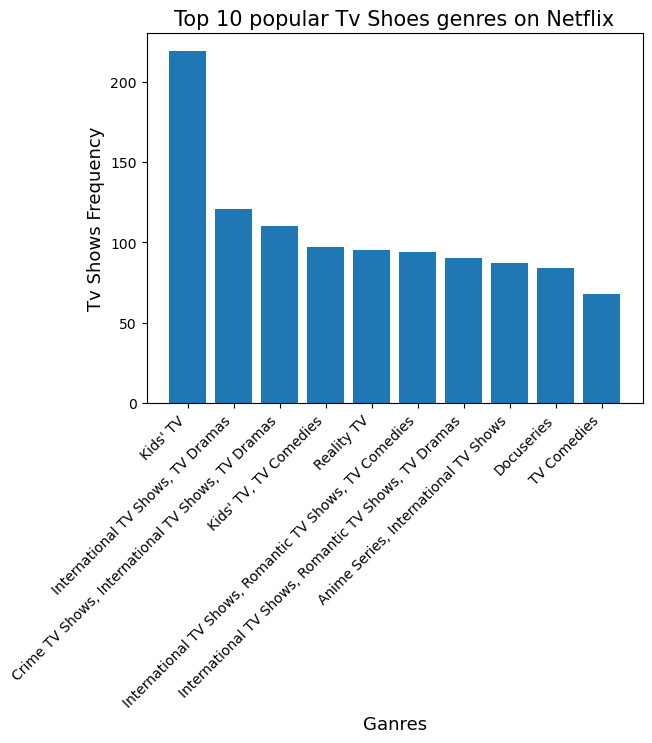

In [190]:
# Plot graph genres with Tv Shows ---------------


plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Ganres",fontsize=13)
plt.ylabel("Tv Shows Frequency",fontsize=13)
plt.title("Top 10 popular Tv Shoes genres on Netflix",fontsize=15)
plt.show()

#### Q8) Top 15 directors across Netflix with high frequency of movies and shows.

In [98]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24


In [192]:
# get all directors count with total movie and convert into DataFrame -----------
directed=data["director"].value_counts().reset_index().sort_values(by="count",ascending=False)[1:15]
directed

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
9,Youssef Chahine,12
10,Jay Chapman,12
8,Martin Scorsese,12


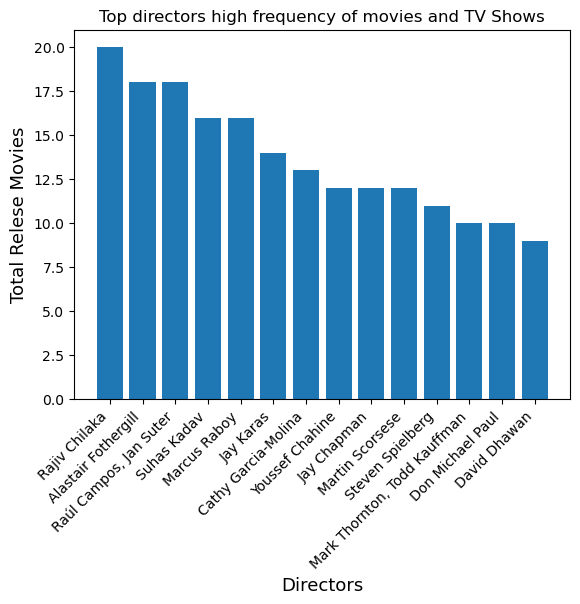

In [194]:
# Plot graph with director name and total movies relese -----------

plt.bar(directed["director"],directed["count"])
plt.xticks(rotation=45,ha="right")
plt.xlabel("Directors",fontsize=13)
plt.ylabel("Total Relese Movies",fontsize=13)
plt.title("Top directors high frequency of movies and TV Shows")
plt.show()

### Conclusion :
#### Q1) Count the number of Movies and TV Shows.
      > -- Total movies count are 6000+ and TV shows are 2500+.
      > -- There are 70% are Movies and 30% are TV Shows.
#### Q2) representation of rating frequency of movies and TV Shows on Netflix.
      > -- There is highest rating categories is "TV-MA" followed by "TV-14" and least rating is "G".
#### Q3)  Top 10 countries with most content on Netflix.
      > -- There is top country most country is "United State" with total content is 3240 followed by "India" with total content is 1057.
#### Q4) Monthly releases of Movies and TV shows on Netflix.
      > -- Netflix relese most movies and TV Shows in "July" month with count of "565" and "262".
#### Q5) Yearly releases of Movies and TV Shows on Netflix.
      > -- Netflix relese most movies in 2019 with total count is 1424 and TV Shows in 2020 with  total count is 595.
#### Q6) Top 10 popular movie and TV Shows genres.
      > -- Top popular movie Genres is "Drama, International Movie" and TV Show Genres is "Kid's TV".
#### Q7) Top 15 directors across Netflix with high frequency of movies and shows.
      > --There is highest movies relese in netflix by "Rajiv Chilaka" with 20 movies and TV show.
      > -- least movie relase in Netflix by "Devid Dhavan" with 9 movies and TV show.
